In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from PIL import Image
import os
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

In [2]:
print(tf.__version__)

2.3.0


In [3]:
data = []
labels = []
classes = 43
cur_path = "E:\\Trafic_sign_detection\\"

#Retrieving the images and their labels 
for i in range(classes):
    path = os.path.join(cur_path,'Train',str(i))
    images = os.listdir(path)

    for a in images:
        try:
            image = Image.open(path + '\\'+ a)
            #image = cv2.imread(path + '\\'+ a)
            image = image.resize((30,30))
            image = np.array(image)
            #sim = Image.fromarray(image)
            data.append(image)
            labels.append(i)
        except:
            print("Error loading image")

#Converting lists into numpy arrays
data = np.array(data)
labels = np.array(labels)

print("data shape :",data.shape, "label shape :", labels.shape)
#Splitting training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

#Converting the labels into one hot encoding
y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)

data shape : (39209, 30, 30, 3) label shape : (39209,)
(31367, 30, 30, 3) (7842, 30, 30, 3) (31367,) (7842,)


In [4]:
X_train.shape

(31367, 30, 30, 3)

In [5]:
#Building the model
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=(30,30,3)))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(43, activation='softmax'))

In [6]:
#Compilation of the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

epochs = 10
history = model.fit(X_train, y_train, batch_size=32, epochs=epochs, validation_data=(X_test, y_test))
model.save("my_model.h5")

Epoch 1/10
981/981 [==============================] - 68s 70ms/step - loss: 2.0190 - accuracy: 0.4862 - val_loss: 0.7189 - val_accuracy: 0.8248
Epoch 2/10
981/981 [==============================] - 71s 73ms/step - loss: 0.7773 - accuracy: 0.7698 - val_loss: 0.2542 - val_accuracy: 0.9361
Epoch 3/10
981/981 [==============================] - 75s 76ms/step - loss: 0.4769 - accuracy: 0.8591 - val_loss: 0.1727 - val_accuracy: 0.9547
Epoch 4/10
981/981 [==============================] - 75s 76ms/step - loss: 0.3702 - accuracy: 0.8922 - val_loss: 0.1118 - val_accuracy: 0.9711
Epoch 5/10
981/981 [==============================] - 69s 71ms/step - loss: 0.3051 - accuracy: 0.9110 - val_loss: 0.0832 - val_accuracy: 0.9765
Epoch 6/10
981/981 [==============================] - 70s 71ms/step - loss: 0.2839 - accuracy: 0.9184 - val_loss: 0.0952 - val_accuracy: 0.9704
Epoch 7/10
981/981 [==============================] - 70s 72ms/step - loss: 0.2785 - accuracy: 0.9201 - val_loss: 0.1039 - val_accuracy:

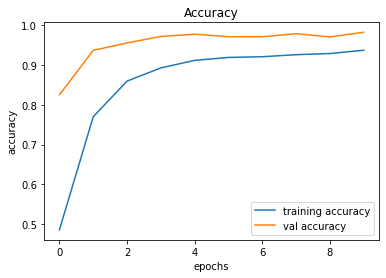

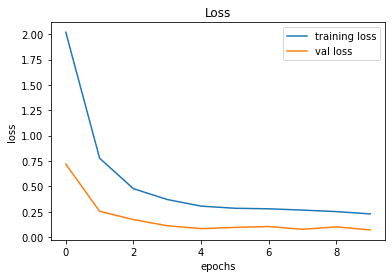

In [7]:
#plotting graphs for accuracy 
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [8]:
#testing accuracy on test dataset
from sklearn.metrics import accuracy_score

y_test = pd.read_csv('Test.csv')

labels = y_test["ClassId"].values
imgs = y_test["Path"].values

data=[]

for img in imgs:
    image = Image.open(img)
    image = image.resize((30,30))
    data.append(np.array(image))

X_test=np.array(data)

pred = model.predict_classes(X_test)

#Accuracy with the test data
from sklearn.metrics import accuracy_score
print(accuracy_score(labels, pred))

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
0.942596991290578


In [9]:
from tensorflow import lite

In [10]:
converter = lite.TFLiteConverter.from_keras_model(model)

In [11]:
tflite_model = converter.convert()
open("my_model_tflite.tflite","wb").write(tflite_model)

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: C:\Users\MG4\AppData\Local\Temp\tmphi10y209\assets


973016